--------------------------------------------
# Heart Attack Analysis & Prediction Dataset
--------------------------------------------
Yuye Tang, 3/16/2024

##### Selected Problem of Interests: 

A heart attack occurs when one or more coronary arteries get blocked, which is a severe medical condition leading to death. 14 out of 100 people will die from a heart attack. A heart attack usually happens outside the hospital environment. Hence, it is of great importance that doctors can give patients prescriptions to prevent life-threatening emergency conditions. 

##### Coursera Project Requirement: 
* Brief description of the data set and a summary of its attributes
* Initial plan for data exploration
* Actions taken for data cleaning and feature engineering
* Key findings and insights, which synthesize the results of exploratory data analysis in an insightful and actionable manner
* Formulating at least 3 hypotheses about this data
* Conducting a formal significance test for one of the hypotheses and discussing the results
* Suggestions for the next steps in analyzing this data
* A paragraph that summarizes the quality of this data set and request for additional data

--------------------------
#### 1. Dataset Description:
--------------------------
- This popular dataset is downloaded from Kaggle (https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data). The primary data source from the Cleavland data from the UCI Machine Learning Reporsitory. https://archive.ics.uci.edu/ml/datasets/Heart+Disease.
- The original dataset has 76 attributes, most published analysis use 14 attributes (see below).
- The dataset contain 303 entries, and consists of several medical predictor variables and one target variable.

##### Attribute Information:

1. **Age** Age of the patients
2. **Sex** Sex of the patient (1 = male; 0 = female)
3. **cp** Chest pain type
   - 1 = typical angina: chest pain related decrease blood supply to the heart
   - 2 = atypical angina: chest pain not related to heart
   - 3 = non-anginal pain: typical esophageal spasms (non heart related)
   - 4 = aymptomatic: chest pain not showing signs of disease
4. **trtbps** Resting blood pressure (in mmHg), above 130-140 is concerning
5. **chol** Cholestroral in mg/dl fetched via BMI sensor
    - serum = LDL + HDL + .2 * triglycerides, above 200 is cause for concern
6. **fbs** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. **restecg**: Resting electrocardiographic results
    - 0 = Nothing to note
    - 1 = ST-T Wave abnormality. T wave inversions and/or ST elevation or depression of > 0.05 mV
        - can range from mild symptoms to servere problems
        - signals non-normal heart beat
    - 2 = Possible or definite left ventricular hypertrophy by Estes' criteria
        - Enlarged heart's main pumping chamber
8. **thalach** Maximum heart rate achieved
9. **exng:** Exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise unhealthy heart will stress more
11. **slp** the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with exercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. **caa** Number of major vessels (0-3) colored by flourosopy. 
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
    - 0 is more likely to have heart disease.
14. **thal** 
    - 0 = normal
    - 1 = fixed defect
    - 2 = reversable defect
15. **output** have disease or not (1 = yes, 0 = no)

-------------------------------
#### 2. Plan for Data Exploration
-------------------------------

Through this dataset, we aim to:

* Load the data, perform data overview (e.g., understanding the data structure, gathering statistics) and data cleaning (e.g., handling missing values, checking for duplicates, examining data anomalis, etc.)
* Perform univeriate and bivariate analysis. Visualize data using histograms, boxplots to understand the distribution of the attributes. Determine whether existing outliers.
* Carry out correlation analysis (e.g., plotting heat map) to determine whether certain attributes are related.
* Formulate hypotheses based on initial observations and conduct statistical tests to accept/reject the formulated hypotheses.
* Document important observations and recommend steps for further analysis or modeling.

------------------------------
#### 3. Actions for Data Cleaning and Feature Engineering
------------------------------

- 3.1 <a href = #link1>Overview of the data and data cleaning </a>
- 3.2 <a href = #link2>Univariate, Bivariate, Correlation Analysis</a>

In [34]:
# import libraries and tools for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

##### <a id='link1'> 3.1 Overview of the data and data cleaning </a>

In [4]:
df = pd.read_csv("heart.csv")         # Load the csv file
df.head(5)                            # Display the table first 5 columns

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape                               # check data shape

(303, 14)

In [6]:
df.info()                              # show data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
duplicate_rows = df[df.duplicated(keep=False)].index    # Find out whether existing duplicate records
duplicate_rows

Index([163, 164], dtype='int64')

In [8]:
df.drop_duplicates(inplace = True)                                    # Drop Duplicate Records if any

In [9]:
missing_values = df.isnull().sum()         # check for missing values, then count the sum for each attributes
missing_values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

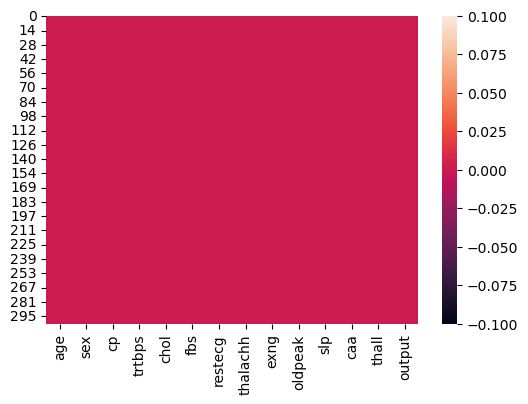

In [10]:
plt.figure(figsize=(6, 4))                   # Check missing values via heatmap
sns.heatmap(df.isna())
plt.show()

In [11]:
df.nunique()                                            # Find out the unique values of each attribute

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [12]:
df1 = df.copy()                                             # Change the numerical value to the category values
List = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall', 'output']
List2 = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'] 
df1[List] = df1[List].astype('category')

##### <a id='link2'> 3.2 Univariate, Bivariate, Correlation Analysis </a>

In [13]:
df1.describe().T                       # summarize the data statistics for each numerical attribute

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2
slp,302.0,1.397351,0.616274,0.0,1.00,1.0,2.00,2.0


In [14]:
 df1[List2].skew()                          # check the skewness of different attribute

age        -0.203743
trtbps      0.716541
chol        1.147332
thalachh   -0.532671
oldpeak     1.266173
dtype: float64

In [15]:
print('Value counts of all categorical columns:')
for x in List:
    print(df1.groupby(x)[x].count())                                 # count categorical columns

Value counts of all categorical columns:
sex
0     96
1    206
Name: sex, dtype: int64
cp
0    143
1     50
2     86
3     23
Name: cp, dtype: int64
fbs
0    257
1     45
Name: fbs, dtype: int64
restecg
0    147
1    151
2      4
Name: restecg, dtype: int64
exng
0    203
1     99
Name: exng, dtype: int64
caa
0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64
thall
0      2
1     18
2    165
3    117
Name: thall, dtype: int64
output
0    138
1    164
Name: output, dtype: int64


In [16]:
for x in List:
    print(df1[x].value_counts(normalize=True))                       # count percentage of the categorical columns

sex
1    0.682119
0    0.317881
Name: proportion, dtype: float64
cp
0    0.473510
2    0.284768
1    0.165563
3    0.076159
Name: proportion, dtype: float64
fbs
0    0.850993
1    0.149007
Name: proportion, dtype: float64
restecg
1    0.500000
0    0.486755
2    0.013245
Name: proportion, dtype: float64
exng
0    0.672185
1    0.327815
Name: proportion, dtype: float64
caa
0    0.579470
1    0.215232
2    0.125828
3    0.066225
4    0.013245
Name: proportion, dtype: float64
thall
2    0.546358
3    0.387417
1    0.059603
0    0.006623
Name: proportion, dtype: float64
output
1    0.543046
0    0.456954
Name: proportion, dtype: float64


8


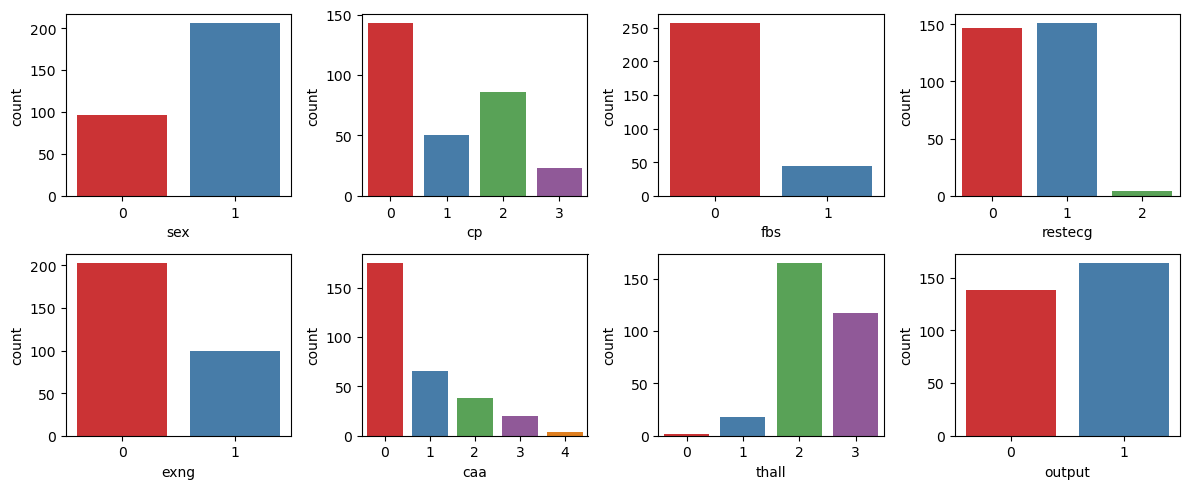

In [17]:
# Plot the categorical attribute count values
num_plots = len(List)
print(num_plots)
num_rows = 2  # Add 1 and then floor division to ensure at least 2 rows
num_cols = num_plots //2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List):
    sns.countplot(data=df1, x=column, ax=axes[i],palette='Set1')
    #axes[i].set_title(f'{column}')
plt.tight_layout()

5


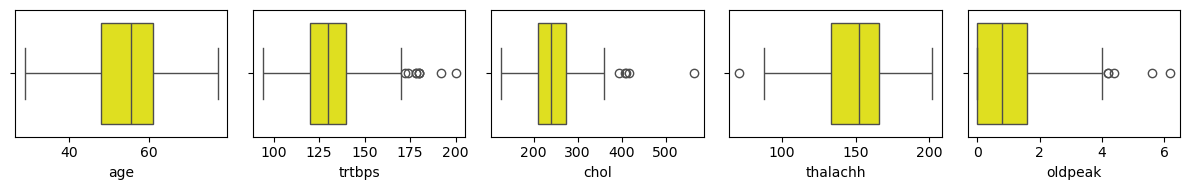

In [18]:
# Show Box Plots for continuous numercial features
num_plots = len(List2)
print(num_plots)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = (num_plots) //1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List2):
    sns.boxplot(data=df1, x=column, ax=axes[i], color = 'yellow')
    #axes[i].set_title(f'{column}')
plt.tight_layout()

5


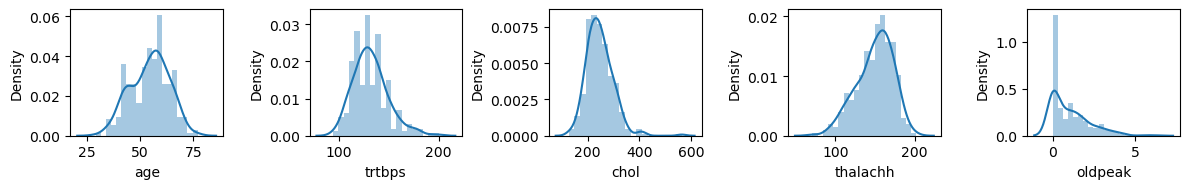

In [19]:
# Show histogram Plots for continuous numercial features
num_plots = len(List2)
print(num_plots)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = (num_plots) //1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List2):
    sns.distplot(df1[column], ax=axes[i],  bins = 20, kde=True)
    #axes[i].set_title(f'{column}')
plt.tight_layout()

In [20]:
# Check the data imbalance ratio
a, b = df1['output'].value_counts()
print(df1['output'].value_counts())                      # See distrubtion of target variable
print(df1['output'].value_counts(normalize=True)*100)    # See percentage distribution of target variable
print("imblance ratio:", b/a) 

output
1    164
0    138
Name: count, dtype: int64
output
1    54.304636
0    45.695364
Name: proportion, dtype: float64
imblance ratio: 0.8414634146341463


In [21]:
# Let us look at the target column to understand how the data is distributed
df.groupby(["output"]).mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [22]:
# Let us look at the target column to understand how the data is distributed
df.groupby(["output"]).median()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,58.0,1.0,0.0,130.0,249.0,0.0,0.0,142.0,1.0,1.4,1.0,1.0,3.0
1,52.0,1.0,2.0,130.0,234.5,0.0,1.0,161.0,0.0,0.2,2.0,0.0,2.0


In [23]:
for x in List:   
    print(pd.crosstab(df1[x],df1['output'],normalize='columns'))  # Check status for categorical columns

output         0         1
sex                       
0       0.173913  0.439024
1       0.826087  0.560976
output         0         1
cp                        
0       0.753623  0.237805
1       0.065217  0.250000
2       0.130435  0.414634
3       0.050725  0.097561
output        0         1
fbs                      
0       0.84058  0.859756
1       0.15942  0.140244
output          0         1
restecg                    
0        0.572464  0.414634
1        0.405797  0.579268
2        0.021739  0.006098
output         0         1
exng                      
0       0.449275  0.859756
1       0.550725  0.140244
output         0         1
caa                       
0       0.326087  0.792683
1       0.318841  0.128049
2       0.224638  0.042683
3       0.123188  0.018293
4       0.007246  0.018293
output         0         1
thall                     
0       0.007246  0.006098
1       0.086957  0.036585
2       0.260870  0.786585
3       0.644928  0.170732
output    0    1
output    

8


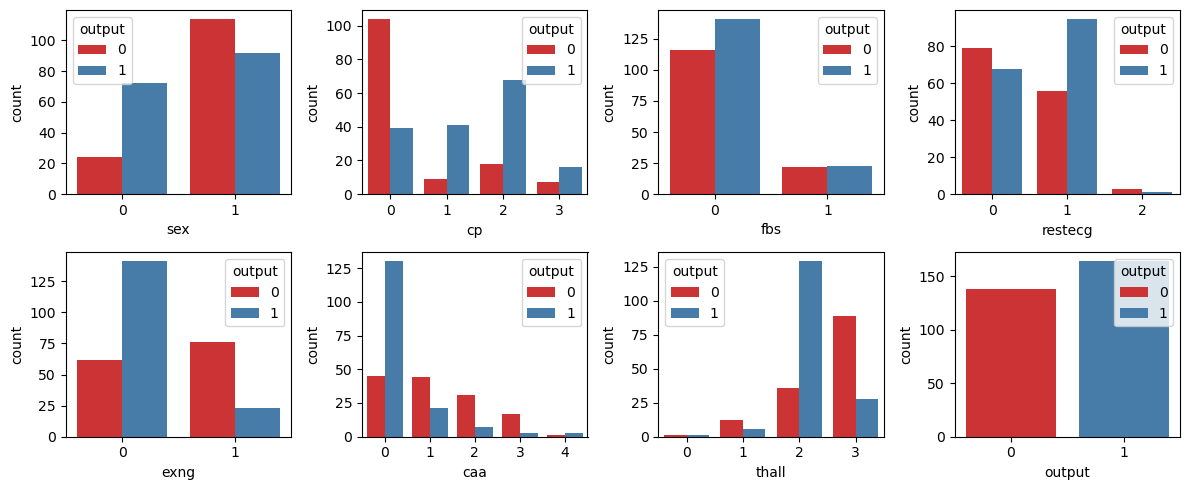

In [24]:
# Plot the categorical attribute count values considering output target
num_plots = len(List)
print(num_plots)
num_rows = 2  # Add 1 and then floor division to ensure at least 2 rows
num_cols = num_plots //2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List):
    sns.countplot(data=df1, x=column, ax=axes[i],palette='Set1', hue = df1["output"])
    #axes[i].set_title(f'{column}')
plt.tight_layout()


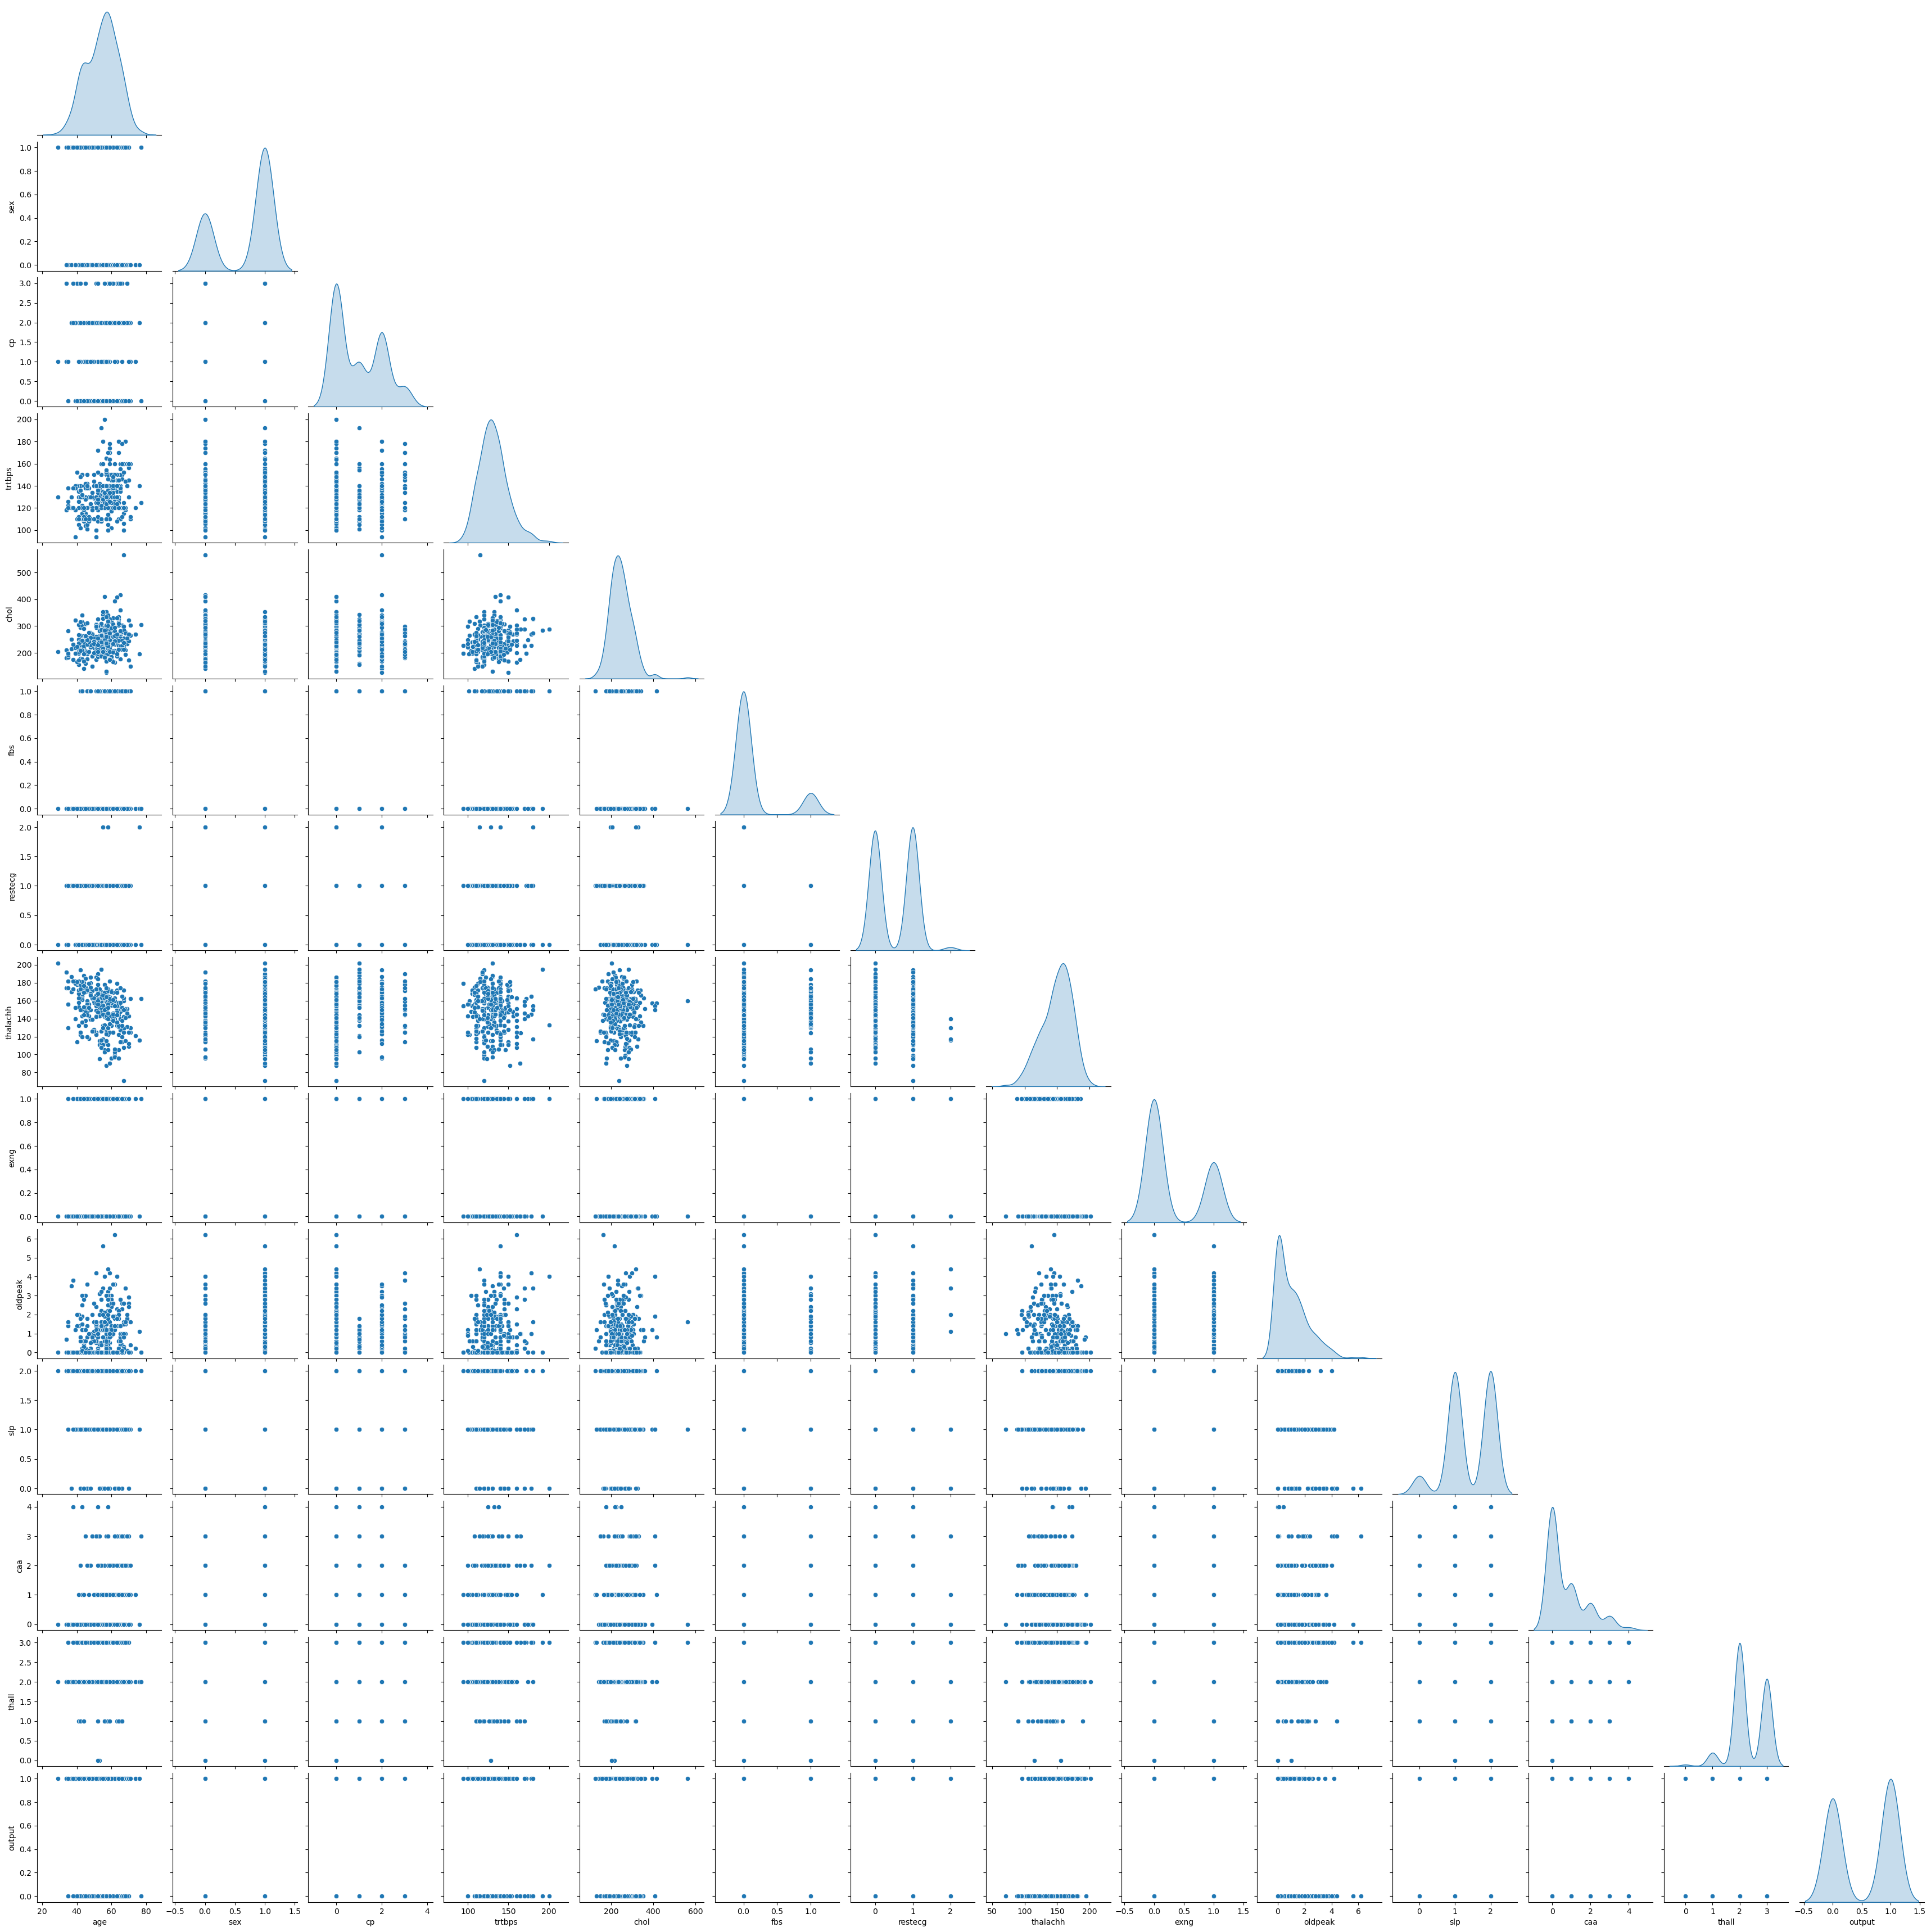

In [25]:
# Check distributions by Outcome
sns.pairplot(df, diag_kind='kde', corner = True)
plt.show()

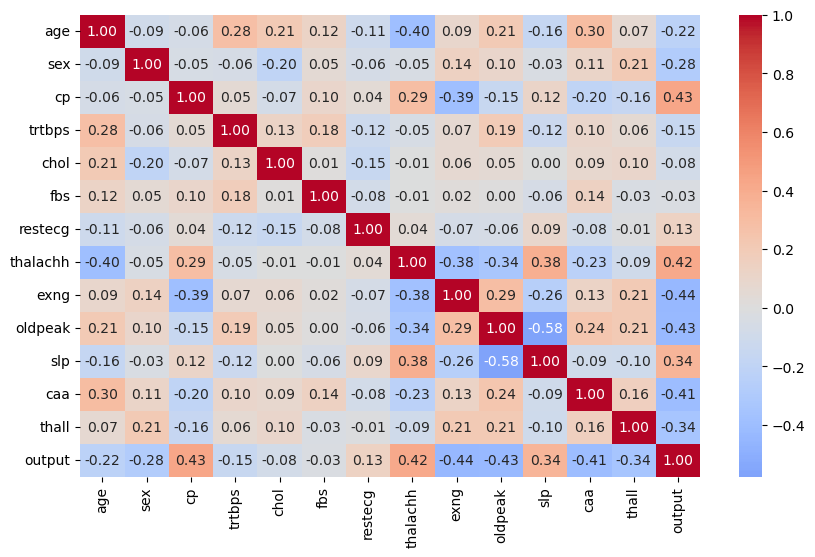

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap='coolwarm', center = 0)  # heatmap
plt.show()  

------------------------------
#### 4. Key Findings and Insights from Exploratory Data Analysis
------------------------------

1. This data set contains 303 entries and 14 data attributes. All data types are numercial, either int64 or float64. Although some attributes are assigned with numerical values, they are actually categorial variables. These categorial attributes include sex, cp, fbs, restecg, exng, caa, thall and output. We have converted them into categorical variable for visualization purpose. The categorical data was plotted as counts of different observations, while numerical variables are plotted using histogram and box plot.
   
2. There are no null values in the dataset. Hence, we do not need to remove missing data rows or replace the missing values. There is one duplicated record, which has been dropped. After cleaning, the data set has 302 data entries. 

3. Data attributes are in different scales. For example, age is from minimum value 29 to maximum value 77; Cholestroral level is from min value of 126mg/dl to 564mg/dl. By normalizing the data based on standard scalar or min/max scalar, it is expected that model prediction can be improved.

4. The numercial attributes include age, trtbps, chol, thalachh, and oldpeak. Except age, all other numerical variables have outliers (which is beyound median +/- 1.5 IQR). But we should keep the outliers in our analysis. 
   
5. All the numerical attributes are skewed (shown in above calculation and histogram plots), especially for oldpeak. If skewness is less than zero, then negatively skewed (left tail) and if greater than zero then positively skewed (right tail). The negatively skewed attributes include, age and thalachh. Other numerical atrributes are positively skewed. We could potentailly apply data transformation to ensure more normal distributed data.

6. Among the 302 unique data records, 164 entries (i.e., 54%) are with output (target) value 1, and 138 entries (i.e., 46%) are with outupt (target) value 0. The imbalance ratio is 0.841. This indicated that we can ignore the imbalance, and we do not have to use under or oversampling techniques to balance the data.
   
7. Based on the bivariable analysis and count plots, we observed: Female has more risk for heart attack; lower caa value has more risk for heart attack; lower restecg level shows less risk for heart attack. Exng seems not a nesscary condition for heart attack. fbs value has less influence on the heart attck.

8. Based on the pair plot, no obevious trends were found between pairs.
   
9. From heat map analysis, we found that oldpeak and slp are negatively correlated. After examining the descriptions of these data attributes. Both are related to the influence of exercise on ST segment. Additionally, cp, thalachh, slp , restecg positively influence the target variable, while age, sex, trtbps, exng, oldpeak, caa, thall negatively influence on the target variable. The influence from chol and fbs is minimal.
   





------------------------------
#### 5. Formulate 3 Hypotheses
------------------------------
Based on the data observations, we formulated three hypotheses:
* Hypothesis 1: Age is normally distributed. 
* Hypothesis 2: Female has more risk for heart attack than male.
* Hypothesis 3: Thеrе is a significant diffеrеncе in heart attack ratеs for diffеrеnt agе groups.

------------------------------
#### 6. Hypothesis Testing
------------------------------

#### Test Hypothesis 1: Age data is normally distributed.
This can be done through Shapiro-Wilk test, which evaluates whether a data set is normally distributed. The null hypothesis is that the dataset is normally distributed. When p value > 0.05 (significance level), we will accept the null hypothesis. Otherwise, we will reject the null and accept the alternative (i.e., the distribution is not normal).

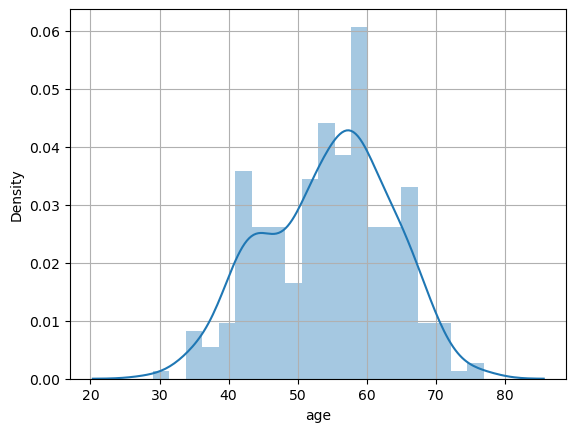

In [47]:
# Generate the distribution of age and Q-Q plot
sns.distplot(df1['age'], bins = 20, kde=True)
plt.grid()
plt.show()

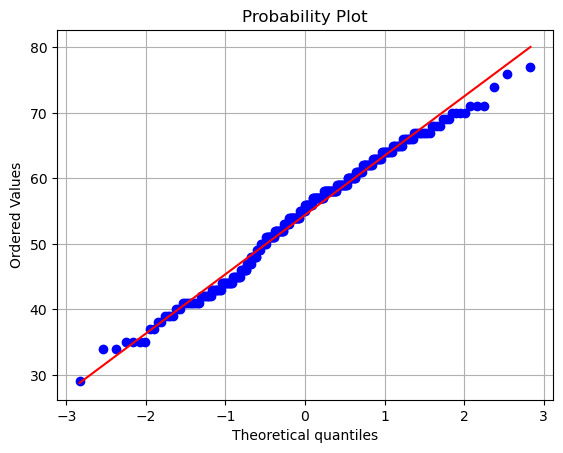

In [53]:
# Generate Q-Q plot
fig = plt.figure()
res = stats.probplot(df1['age'], sparams=(), dist='norm', fit=True, rvalue=False, plot=plt)
plt.grid()
plt.show()


In [49]:
# Perform Shapiro-Wilk test
from scipy.stats import shapiro
import scipy.stats as stats
shapiro(df1['age'])

ShapiroResult(statistic=0.9866365790367126, pvalue=0.0067442781291902065)

* ##### Conclusion: Since the p value < 0.05, we will reject the null hypothesis and accept the alternative. Age data is not normally distributed.

------------------------------
#### 7. Suggestions for Next Steps
------------------------------

Suggested next steps include:

- Apply data transformation to the skewed data attributes, such as log, squareroot, box-cox, Yeo-Johnson transformations.
- Apply standard or min/max scaler to scale the data.
- Peform train/validation/test split.
- Select models for performing the classification tasks, including logistic regression, random forest classification, support vector machine classifer, and so on.
- Train model and tuning the hyper parameters.
- Compare the accuracies between different models, in terms of different accuracy measurements. 

------------------------------
#### 8. Discussion for Data Quality
------------------------------

This dataset has been generally considered in good quality, which has been utilized in many literature. The original dataset has 76 attributes, only 14 are mostly used (which are in this downloaded dataset). When examining the description of the data attributes, they are the most relavent to predit the heart attack. For instance, the "caa" represents the number of major vessels colored by flourosopy. The lower the number indicates the clots existing in the blood vessels, resulting in higher heart attack risk. Resting electrocardiographic results, "restecg", are directly related to heart condition. The ST segment (flat or slightly upcurved line) between the S wave and the T wave represents the time between ventricular depolarization and repolarization. The "slp" and "oldpeak" are related to the ST segment upon different conditions, such as excercise and sleep. "trtbps" and "thalach" are indicators of blood pressure and rate of heart beat. There are some deomgraphic information (age, sex) included. However, this dataset only contains 303 total entries. More data can be collected to better understand the influcence of various attributes on the final prediction.